In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load your historical stock price data into a pandas DataFrame
# Make sure you have a 'Date' column and a 'Close' column
df = pd.read_csv('TSLA-2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,22.169333,22.799999,21.940001,22.488001,22.488001,114364500
1,2018-11-01,22.550667,23.189333,22.315332,22.952000,22.952000,120001500
2,2018-11-02,22.916000,23.280001,22.727333,23.094000,23.094000,117120000
3,2018-11-05,22.700001,22.930668,22.009333,22.760000,22.760000,117465000
4,2018-11-06,22.604668,23.253332,22.406000,22.737333,22.737333,101443500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Exploratory Data Analysis

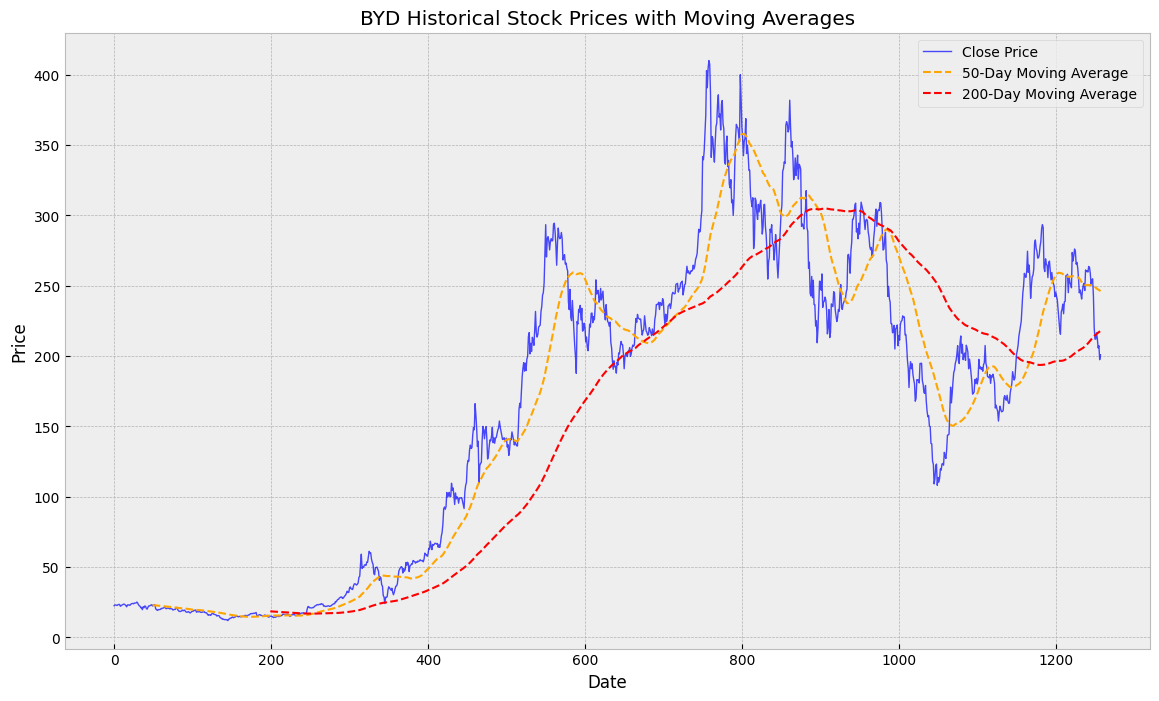

In [ ]:
# Calculate a 50-day moving average
df['50_Day_MA'] = df['Close'].rolling(window=50).mean()

# Calculate a 200-day moving average
df['200_Day_MA'] = df['Close'].rolling(window=200).mean()

# EDA: Create a visually appealing historical graph
plt.figure(figsize=(14, 8))

# Plot historical stock prices
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.7, linewidth=1)

# Plot the 50-day moving average
plt.plot(df.index, df['50_Day_MA'], label='50-Day Moving Average', color='orange', linestyle='--', linewidth=1.5)

# Plot the 200-day moving average
plt.plot(df.index, df['200_Day_MA'], label='200-Day Moving Average', color='red', linestyle='--', linewidth=1.5)

plt.title('BYD Historical Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

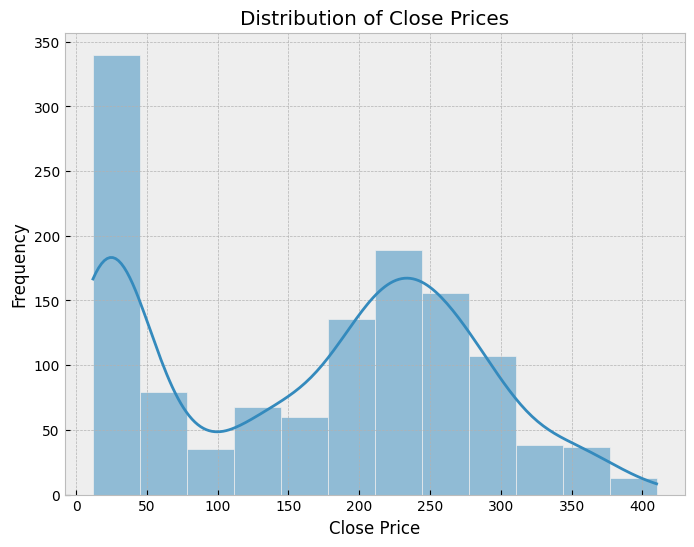

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot a histogram for 'Close' prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

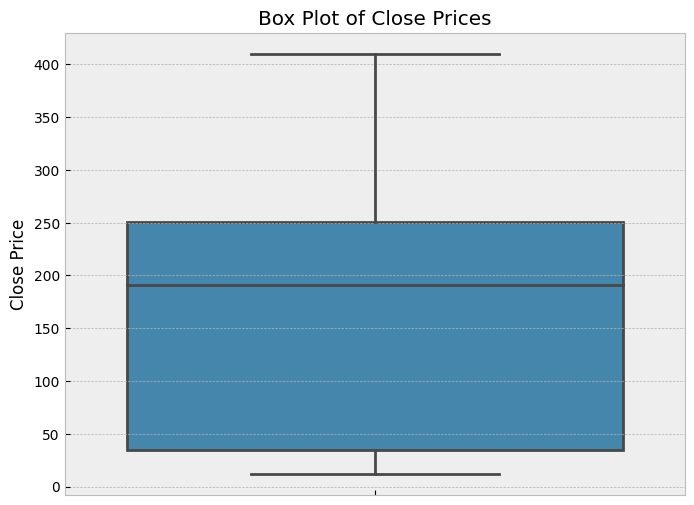

In [ ]:
# Box plot for 'Close' prices
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Close'])
sns.boxplot(x=df['Year'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

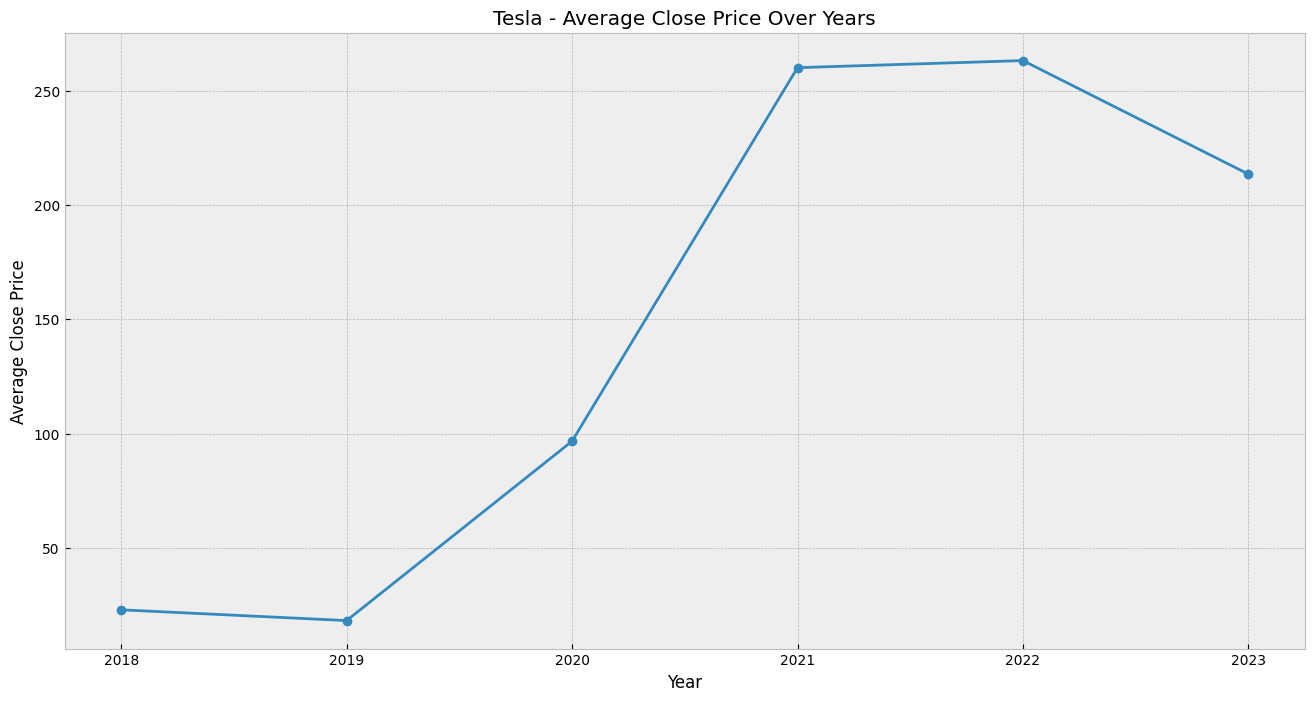

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your 'Date' column is not in datetime format, convert it:
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and calculate the mean close price for each year
df_yearly = df.groupby('Year')['Close'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Tesla - Average Close Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.plot(df_yearly['Year'], df_yearly['Close'], marker='o', linestyle='-')
plt.show()

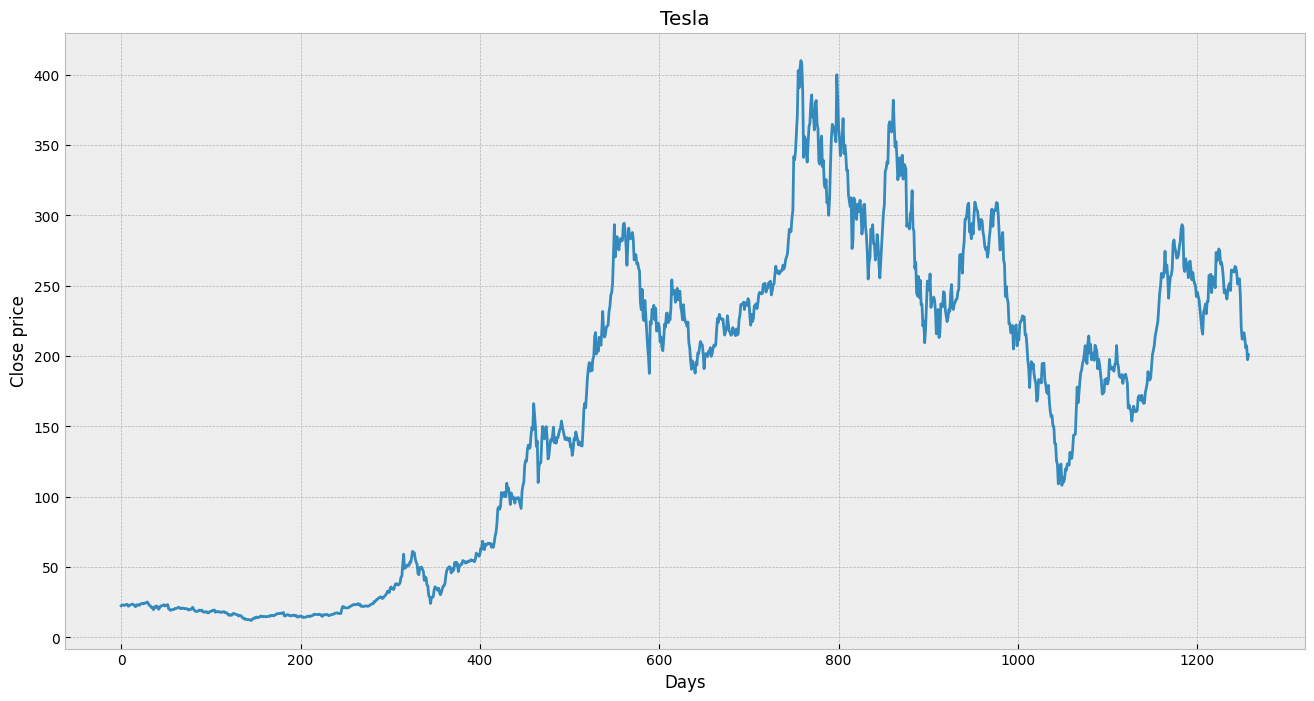

In [ ]:
#visualize close price data
plt.figure(figsize = (16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.show()

## Data Preparation for Modeling

In [ ]:
#select the needed variables
data = df.sort_index(ascending=True, axis=0)
df2 = pd.DataFrame(index=range(0,len(df)),columns=['Date','Volume','Close'])
df2.head()

,Date,Volume,Close
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
#apply the data into the new dataframe
for i in range(0,len(data)):
     df2['Date'][i] = data['Date'][i]
     df2['Close'][i] = data['Close'][i]
     df2['Volume'][i] = data['Volume'][i]

In [ ]:
#change the date to datetimestamp
df2['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [ ]:
df2.head()

,Date,Volume,Close
0,2018-10-31,114364500,22.488001
1,2018-11-01,120001500,22.952
2,2018-11-02,117120000,23.094
3,2018-11-05,117465000,22.76
4,2018-11-06,101443500,22.737333


In [ ]:
#drop all null rows
df2 = df2.dropna()

In [ ]:
#split into train and validation, dont use random as the dates are consequtive

# Set the proportion for the training set
train_ratio = 0.8

# Calculate the index to split the data
split_index = int(len(df2) * train_ratio)

# Split the data
train_data = df2[:split_index]
valid_data = df2[split_index:]

# Split into features and target for training set
x_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']

# Split into features and target for validation set
x_valid = valid_data.drop('Close', axis=1)
y_valid = valid_data['Close']


In [ ]:
# Extract day, month, and year as numerical features
x_train['Day'] = pd.to_datetime(x_train['Date']).dt.day
x_train['Month'] = pd.to_datetime(x_train['Date']).dt.month
x_train['Year'] = pd.to_datetime(x_train['Date']).dt.year

# Drop the original 'Date' column
x_train = x_train.drop('Date', axis=1)

In [ ]:
# Extract day, month, and year as numerical features for x_valid
x_valid['Day'] = pd.to_datetime(x_valid['Date']).dt.day
x_valid['Month'] = pd.to_datetime(x_valid['Date']).dt.month
x_valid['Year'] = pd.to_datetime(x_valid['Date']).dt.year

# Drop the original 'Date' column for x_valid
x_valid = x_valid.drop('Date', axis=1)

## Modeling

In [ ]:
#create nmodels
#create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#use fitted models to predict
tree_prediction = tree.predict(x_valid)
linear_prediction = lr.predict(x_valid)

### Linear Regression

<ipython-input-23-3bd0bf07e114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = linear_prediction


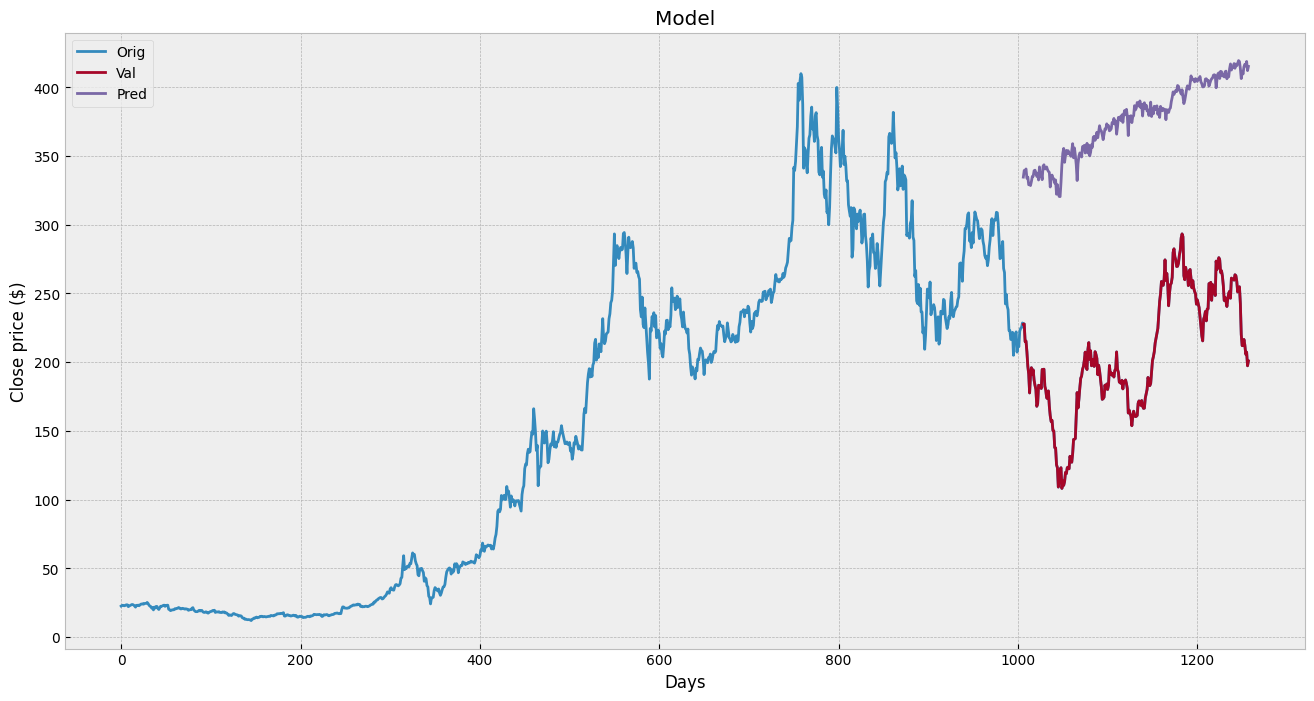

In [ ]:
#visualize predictions linear regression
valid_data['Predictions'] = linear_prediction

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close','Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


### Decision Tree

<ipython-input-19-b565b93f6b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = tree_prediction


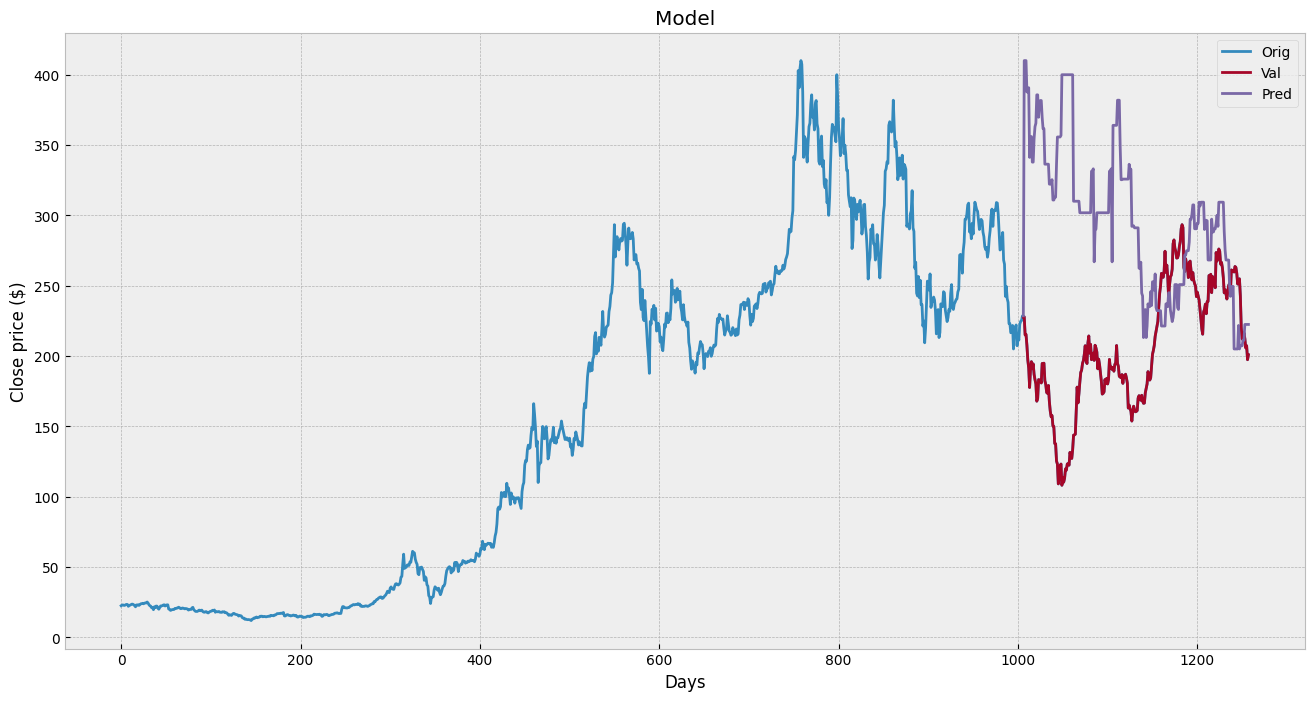

In [ ]:
#visualize predictions for Decision Tree
valid_data['Predictions'] = tree_prediction

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close','Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

### Naive Bayes

<ipython-input-20-7be03463cf56>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions_BR'] = br_predictions


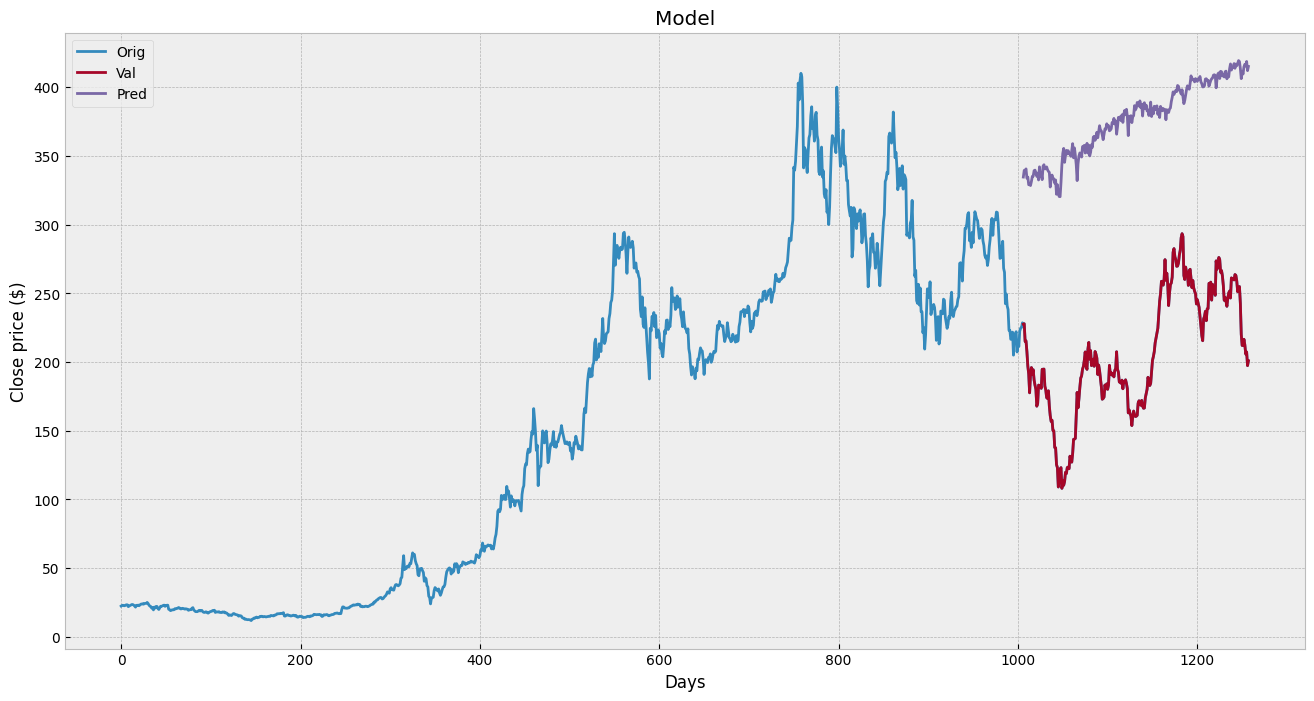

In [ ]:
from sklearn.linear_model import BayesianRidge

# Create Bayesian Ridge model
br = BayesianRidge().fit(x_train, y_train)

# Make predictions on the validation set
br_predictions = br.predict(x_valid)

# Visualize predictions
valid_data['Predictions_BR'] = br_predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close', 'Predictions_BR']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


### Support Vector Machine (SVR)

<ipython-input-21-25a091fbe4c9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions_SVR'] = svr_predictions


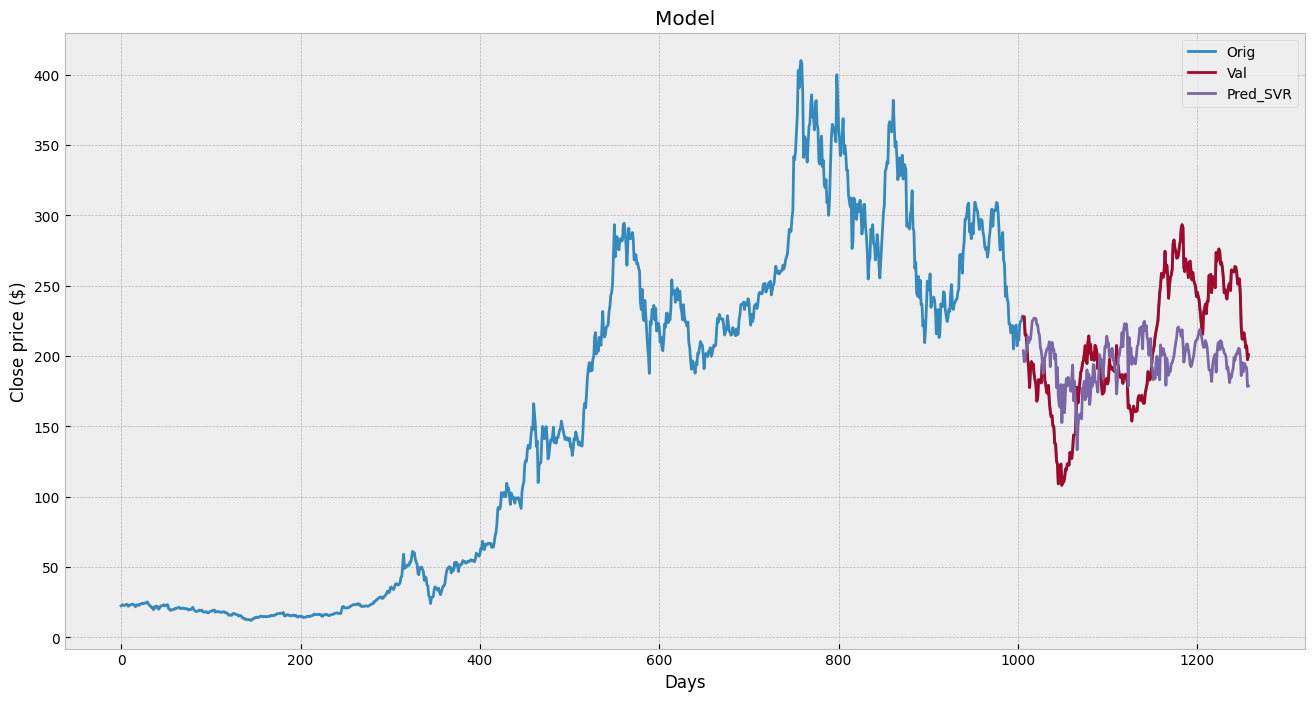

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Create SVR model
svr = SVR()
scaler = StandardScaler()

# Scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# Fit SVR model
svr.fit(x_train_scaled, y_train)

# Make predictions on the validation set
svr_predictions = svr.predict(x_valid_scaled)

# Visualize predictions
valid_data['Predictions_SVR'] = svr_predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close', 'Predictions_SVR']])
plt.legend(['Orig', 'Val', 'Pred_SVR'])
plt.show()


### Model Predictions against each other

<ipython-input-22-9b171ac8ed9e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Linear_Predictions'] = linear_prediction
<ipython-input-22-9b171ac8ed9e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Tree_Predictions'] = tree_prediction
<ipython-input-22-9b171ac8ed9e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

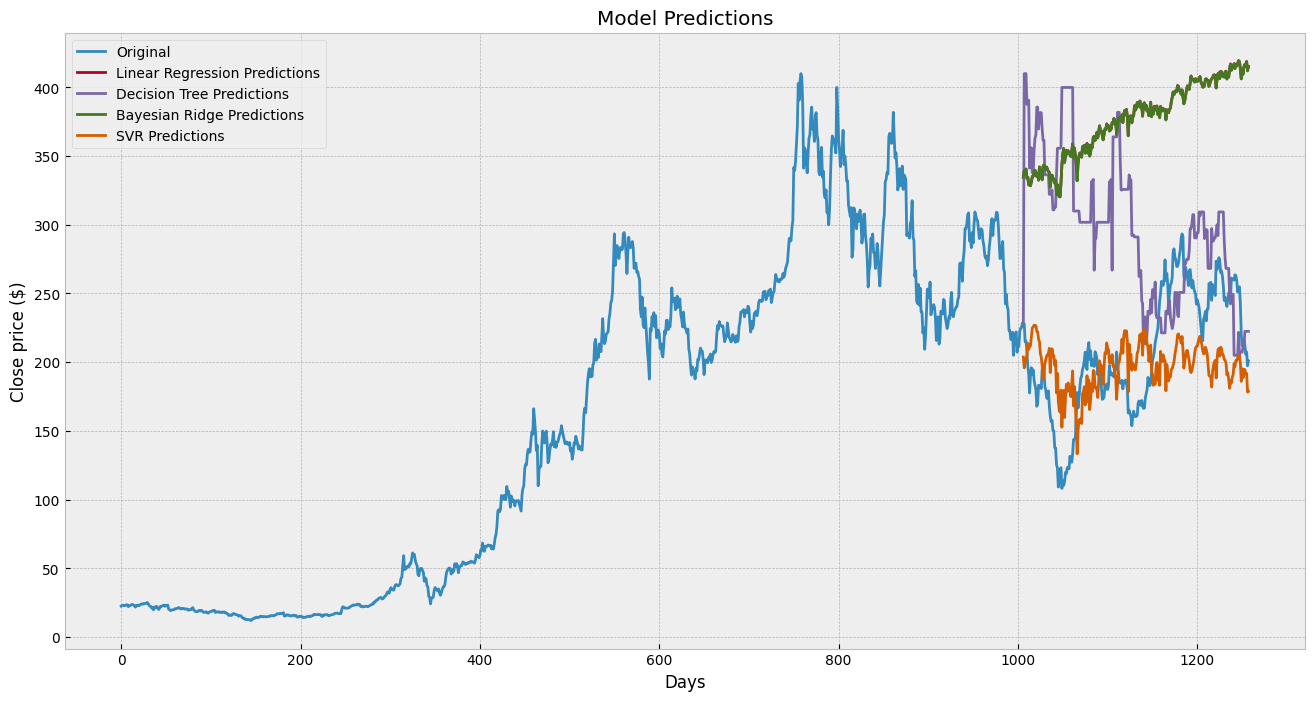

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Model Predictions')
plt.xlabel('Days')
plt.ylabel('Close price ($)')

# Original data
plt.plot(df['Close'], label='Original')

# Linear regression predictions
valid_data['Linear_Predictions'] = linear_prediction
plt.plot(valid_data[['Linear_Predictions']], label='Linear Regression Predictions')

# Decision tree predictions
valid_data['Tree_Predictions'] = tree_prediction
plt.plot(valid_data[['Tree_Predictions']], label='Decision Tree Predictions')

# Bayesian Ridge predictions
valid_data['BR_Predictions'] = br_predictions
plt.plot(valid_data[['BR_Predictions']], label='Bayesian Ridge Predictions')

# SVR predictions
valid_data['SVR_Predictions'] = svr_predictions
plt.plot(valid_data[['SVR_Predictions']], label='SVR Predictions')

plt.legend()
plt.show()




# # Visualize predictions for both linear regression and decision tree on the same plot
# plt.figure(figsize=(16, 8))
# plt.title('Model Predictions')
# plt.xlabel('Days')
# plt.ylabel('Close price ($)')

# # Original data
# plt.plot(df['Close'], label='Original')

# # Linear regression predictions
# valid_data['Linear_Predictions'] = linear_prediction
# plt.plot(valid_data[['Linear_Predictions']], label='Linear Regression Predictions')

# # Decision tree predictions
# valid_data['Tree_Predictions'] = tree_prediction
# plt.plot(valid_data[['Tree_Predictions']], label='Decision Tree Predictions')

# plt.legend()
# plt.show()



### Long-Short Term Memory Predictions

Epoch 1/50
32/32 [==============================] - 3s 8ms/step - loss: 0.0354
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 3/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 11/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 12/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 13/50
32/32 [==============================

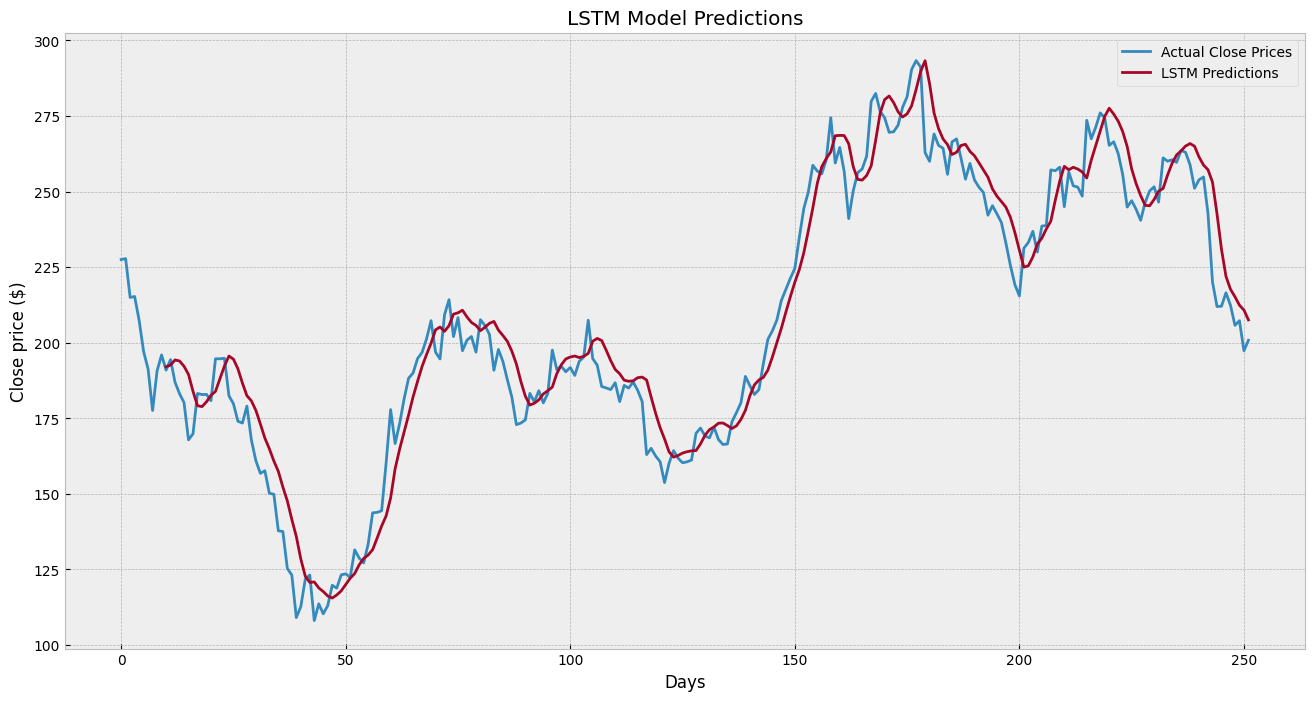

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df2 is your DataFrame with 'Close' prices
# ...

# Set the proportion for the training set
train_ratio = 0.8

# Calculate the index to split the data
split_index = int(len(df2) * train_ratio)

# Split the data
train_data = df2[:split_index]
valid_data = df2[split_index:]

# Extract the 'Close' prices for training and validation
train_close = train_data['Close'].values.reshape(-1, 1)
valid_close = valid_data['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_scaled = scaler.fit_transform(train_close)
valid_close_scaled = scaler.transform(valid_close)

# Convert the time series data into sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i : (i + sequence_length), 0]
        sequences.append(sequence)
    return np.array(sequences)

# Define the sequence length (you can adjust this based on your preference)
sequence_length = 10

# Create sequences for training and validation
x_train_sequence = create_sequences(train_close_scaled, sequence_length)
x_valid_sequence = create_sequences(valid_close_scaled, sequence_length)

# Create corresponding target values
y_train_sequence = train_close_scaled[sequence_length:]
y_valid_sequence = valid_close_scaled[sequence_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_sequence.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_sequence, y_train_sequence, epochs=50, batch_size=32)

# Make predictions on the validation set
valid_predictions_scaled = model.predict(x_valid_sequence)

# Inverse transform the scaled predictions to get actual prices
valid_predictions = scaler.inverse_transform(valid_predictions_scaled)

# Visualize predictions
plt.figure(figsize=(16, 8))
plt.title('LSTM Model Predictions')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(valid_data['Close'].values, label='Actual Close Prices')
plt.plot(np.arange(sequence_length, len(valid_data)), valid_predictions, label='LSTM Predictions')
plt.legend()
plt.show()


### Long-Short Term Memory vs training data vs validation data

Epoch 1/50
32/32 [==============================] - 3s 8ms/step - loss: 0.0490
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 10/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 11/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 12/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 13/50
32/32 [==============================

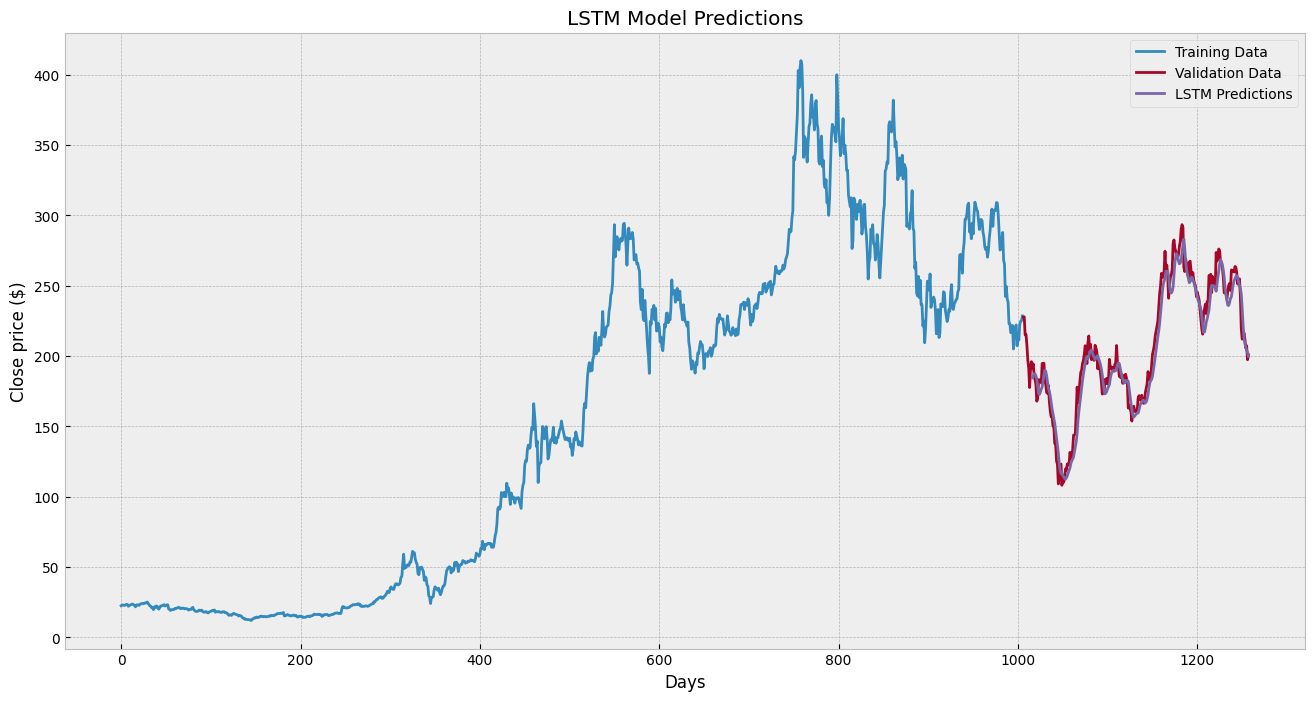

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df2 is your DataFrame with 'Close' prices
# ...

# Set the proportion for the training set
train_ratio = 0.8

# Calculate the index to split the data
split_index = int(len(df2) * train_ratio)

# Split the data
train_data = df2[:split_index]
valid_data = df2[split_index:]

# Extract the 'Close' prices for training and validation
train_close = train_data['Close'].values.reshape(-1, 1)
valid_close = valid_data['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_scaled = scaler.fit_transform(train_close)
valid_close_scaled = scaler.transform(valid_close)

# Convert the time series data into sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i : (i + sequence_length), 0]
        sequences.append(sequence)
    return np.array(sequences)

# Define the sequence length (you can adjust this based on your preference)
sequence_length = 10

# Create sequences for training and validation
x_train_sequence = create_sequences(train_close_scaled, sequence_length)
x_valid_sequence = create_sequences(valid_close_scaled, sequence_length)

# Create corresponding target values
y_train_sequence = train_close_scaled[sequence_length:]
y_valid_sequence = valid_close_scaled[sequence_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_sequence.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_sequence, y_train_sequence, epochs=50, batch_size=32)

# Make predictions on the validation set
valid_predictions_scaled = model.predict(x_valid_sequence)

# Inverse transform the scaled predictions to get actual prices
valid_predictions = scaler.inverse_transform(valid_predictions_scaled)

# Prepare data for plotting
train_data_plot = train_data['Close'].values
valid_data_plot = valid_data['Close'].values
valid_data_plot_with_nan = np.concatenate([np.full(sequence_length, np.nan), valid_data_plot])

# Flatten the 2D LSTM predictions
valid_predictions_flat = valid_predictions.flatten()

# Calculate the correct length for the x-axis values
x_values = np.arange(len(train_data_plot) + sequence_length, len(train_data_plot) + len(valid_data_plot) + sequence_length)

# Trim valid_predictions_flat to match the length of x_values
valid_predictions_flat_trimmed = valid_predictions_flat[:len(x_values)]

# Visualize predictions
plt.figure(figsize=(16, 8))
plt.title('LSTM Model Predictions')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(np.arange(len(train_data_plot)), train_data_plot, label='Training Data')
plt.plot(np.arange(len(train_data_plot), len(train_data_plot) + len(valid_data_plot)), valid_data_plot, label='Validation Data')
plt.plot(x_values[:len(valid_predictions_flat_trimmed)], valid_predictions_flat_trimmed, label='LSTM Predictions')
plt.legend()
plt.show()



### ARIMA Model Prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


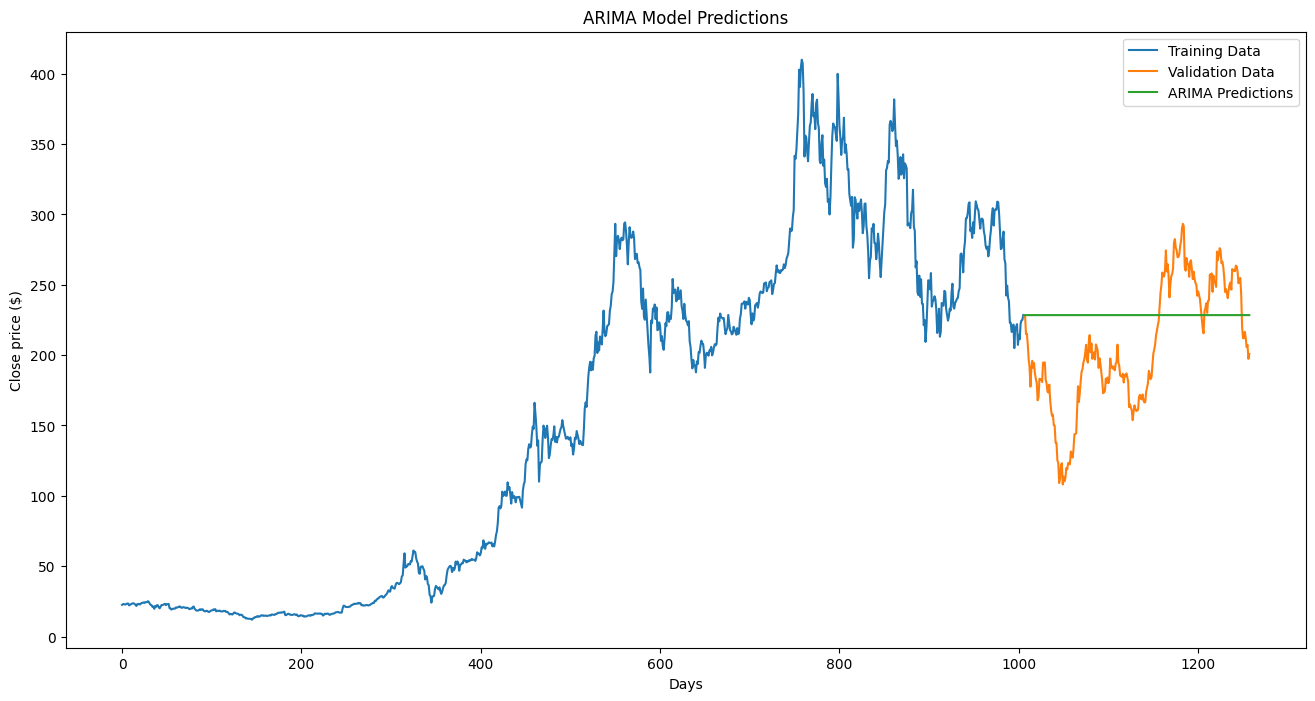

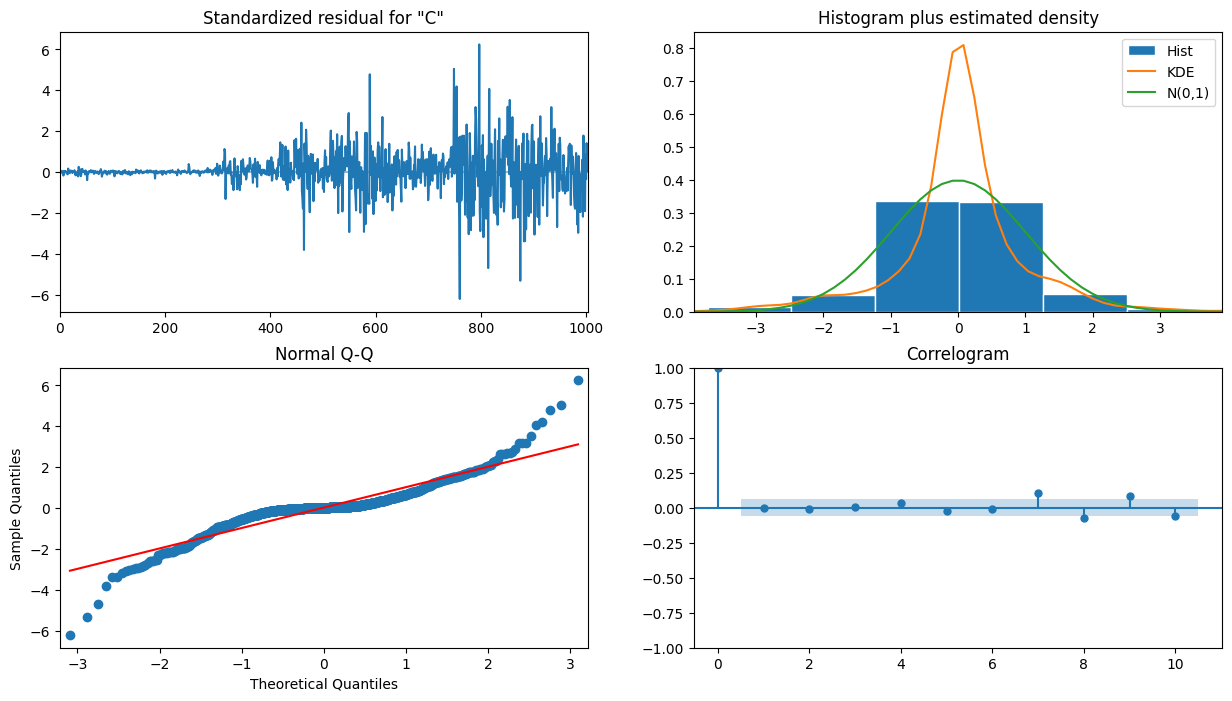

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Set the proportion for the training set
train_ratio = 0.8

# Calculate the index to split the data
split_index = int(len(df2) * train_ratio)

# Split the data
train_data = df2[:split_index]
valid_data = df2[split_index:]

# Extract the 'Close' prices for training and validation
train_close = train_data['Close']
valid_close = valid_data['Close']

# Convert 'Close' to numeric type
train_close = pd.to_numeric(train_close, errors='coerce').dropna()

# Fit ARIMA model
order = (2, 1, 2)  # You may need to tune these parameters based on your data
arima_model = ARIMA(train_close, order=order)
arima_fit = arima_model.fit()

# Make predictions on the validation set
arima_predictions = arima_fit.predict(start=len(train_close), end=len(train_close) + len(valid_close) - 1, typ='levels')

# Prepare data for plotting
train_data_plot = train_data['Close'].values
valid_data_plot = valid_data['Close'].values

# Visualize predictions
plt.figure(figsize=(16, 8))
plt.title('ARIMA Model Predictions')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(np.arange(len(train_data_plot)), train_data_plot, label='Training Data')
plt.plot(np.arange(len(train_data_plot), len(train_data_plot) + len(valid_data_plot)), valid_data_plot, label='Validation Data')
plt.plot(np.arange(len(train_data_plot), len(train_data_plot) + len(valid_data_plot)), arima_predictions, label='ARIMA Predictions')
plt.legend()
plt.show()

# After fitting ARIMA model
arima_fit.plot_diagnostics(figsize=(15, 8))
plt.show()
